In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('sensitivity.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
sens_rn222_scaling_d024 = np.genfromtxt('Data/d024_sensitivity_vs_rn222.csv',\
                                        delimiter=',',\
                                       skip_header=1)
sens_xe137_scaling_d024 = np.genfromtxt('Data/d024_sensitivity_vs_xe137.csv',\
                                       delimiter=',',\
                                       skip_header=1)
dp_gamma_scaling_d024 = np.genfromtxt('Data/d024_dp_vs_gamma.csv',\
                                       delimiter=',',\
                                       skip_header=1)



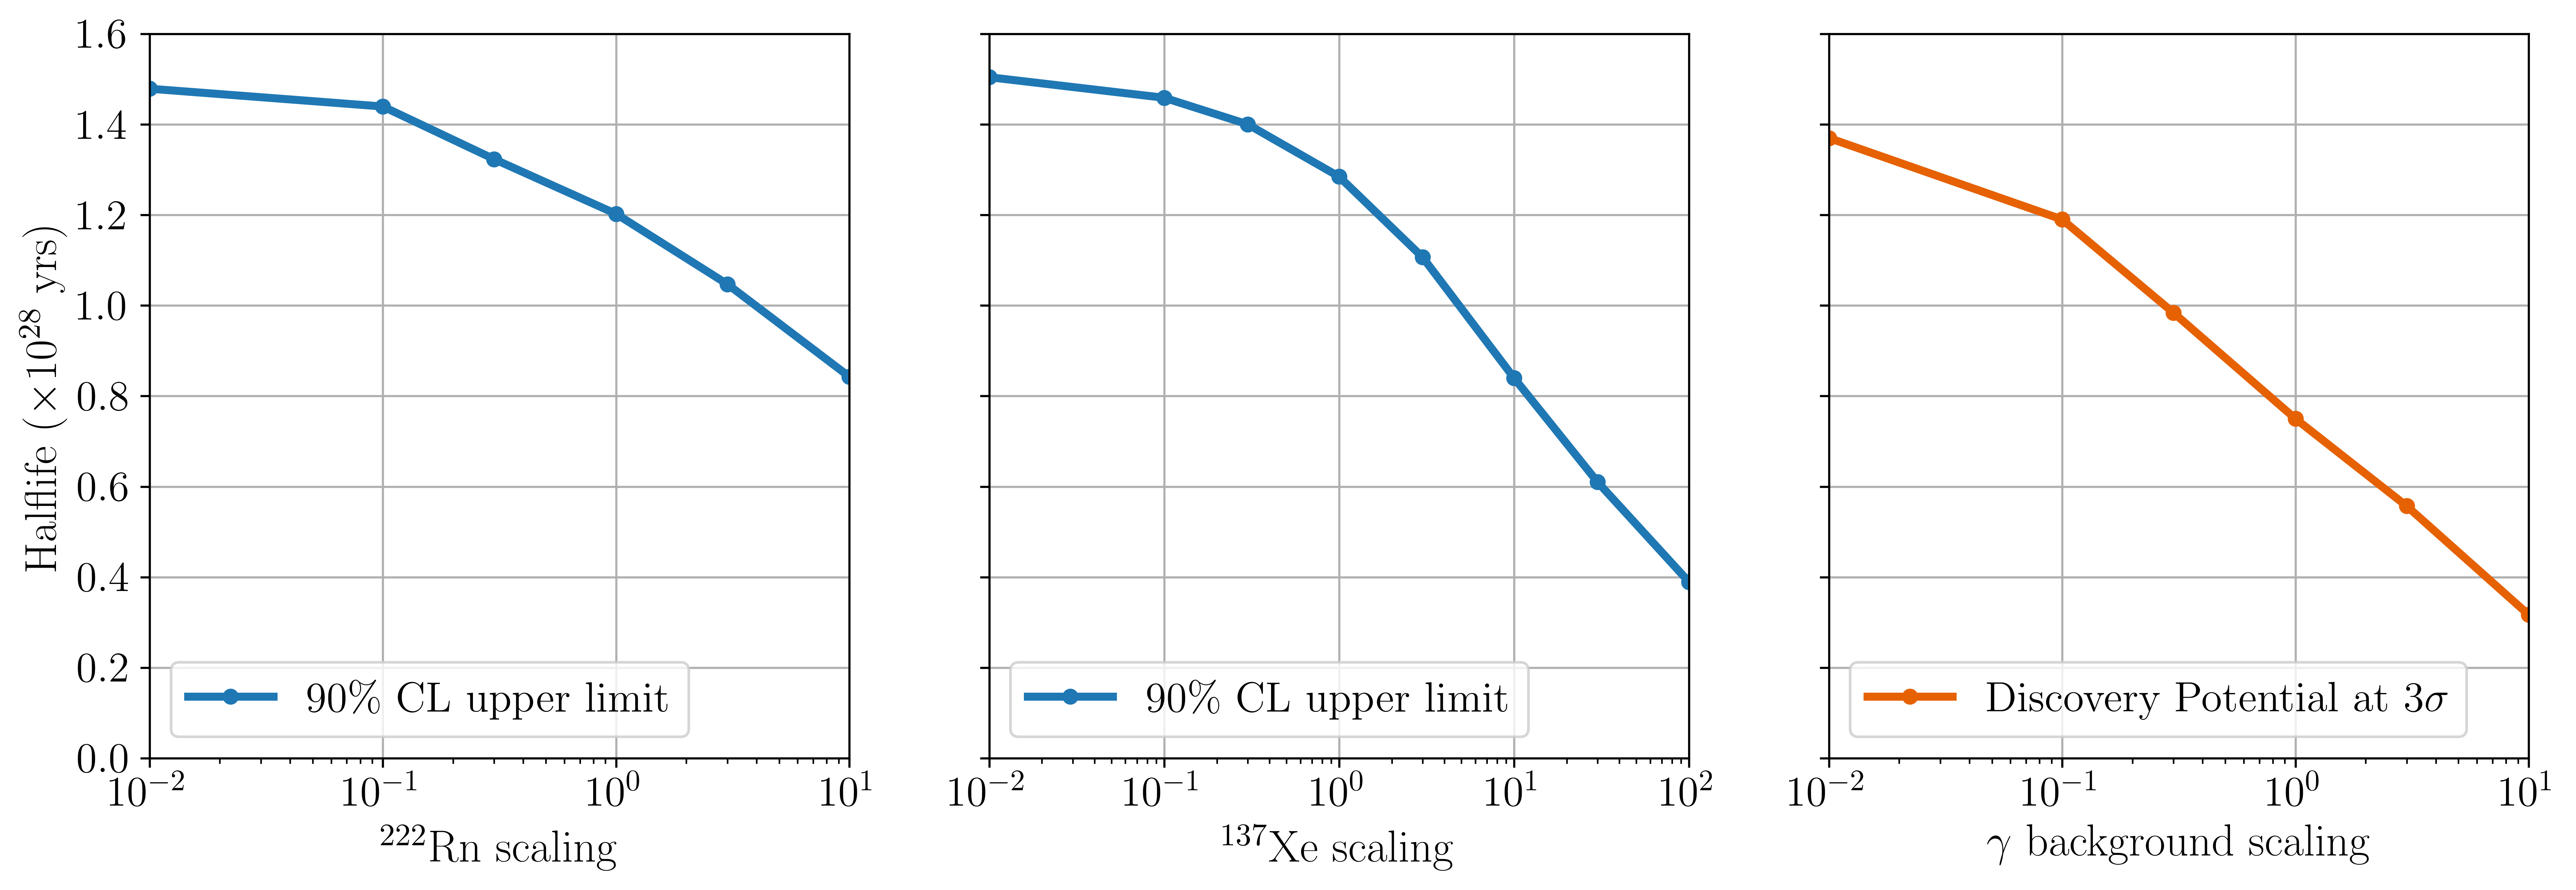

In [3]:
fig, ax = plt.subplots(figsize=(16,5), ncols=3,nrows=1,sharey=True)

# First panel: Rn222 scaling
ax[0].plot(sens_rn222_scaling_d024[:,0],sens_rn222_scaling_d024[:,1],\
           '-o',linewidth=3,markersize=5,label='90\% CL upper limit',color=colors[0])
ax[0].set_xscale('log')
ax[0].set_xlabel(r'$^{222}$Rn scaling')
ax[0].set_ylabel(r'Halflife ($\times 10^{28}$ yrs)')
ax[0].set_ylim(0.,1.6)
ax[0].legend(loc='lower left')
ax[0].set_xlim(0.01,10.)
ax[0].grid()


# Second panel: Xe137 scaling
ax[1].plot(sens_xe137_scaling_d024[:,0],sens_xe137_scaling_d024[:,1]/1.e28,\
           '-o',linewidth=3,markersize=5,label='90\% CL upper limit',color=colors[0])
ax[1].set_xscale('log')
ax[1].set_xlabel('$^{137}$Xe scaling')
#ax[1].set_ylabel(r'Halflife ($\times 10^{28}$ yrs)')
ax[1].set_ylim(0.,1.6)
ax[1].set_xlim(0.01,100.)
ax[1].legend(loc='lower left')
ax[1].grid()


# Third panel: gamma scaling
# ax[2].plot(sens_xe137_scaling_d024[:,0],sens_xe137_scaling_d024[:,1]/1.e28,\
#            '-o',linewidth=3,markersize=5,label='90\% CL upper limit',color=colors[0])

ax[2].plot(dp_gamma_scaling_d024[:,0],dp_gamma_scaling_d024[:,1]/1.e28,\
           '-o',linewidth=3,markersize=5,label='Discovery Potential at $3\sigma$',color=colors[1])
ax[2].set_xscale('log')
ax[2].set_xlabel('$\gamma$ background scaling')
#ax[1].set_ylabel(r'Halflife ($\times 10^{28}$ yrs)')
ax[2].set_ylim(0.,1.6)
ax[2].set_xlim(0.01,10.)
ax[2].legend(loc='lower left')
ax[2].grid()

plt.savefig('sensitivity_vs_background_scaling.png')

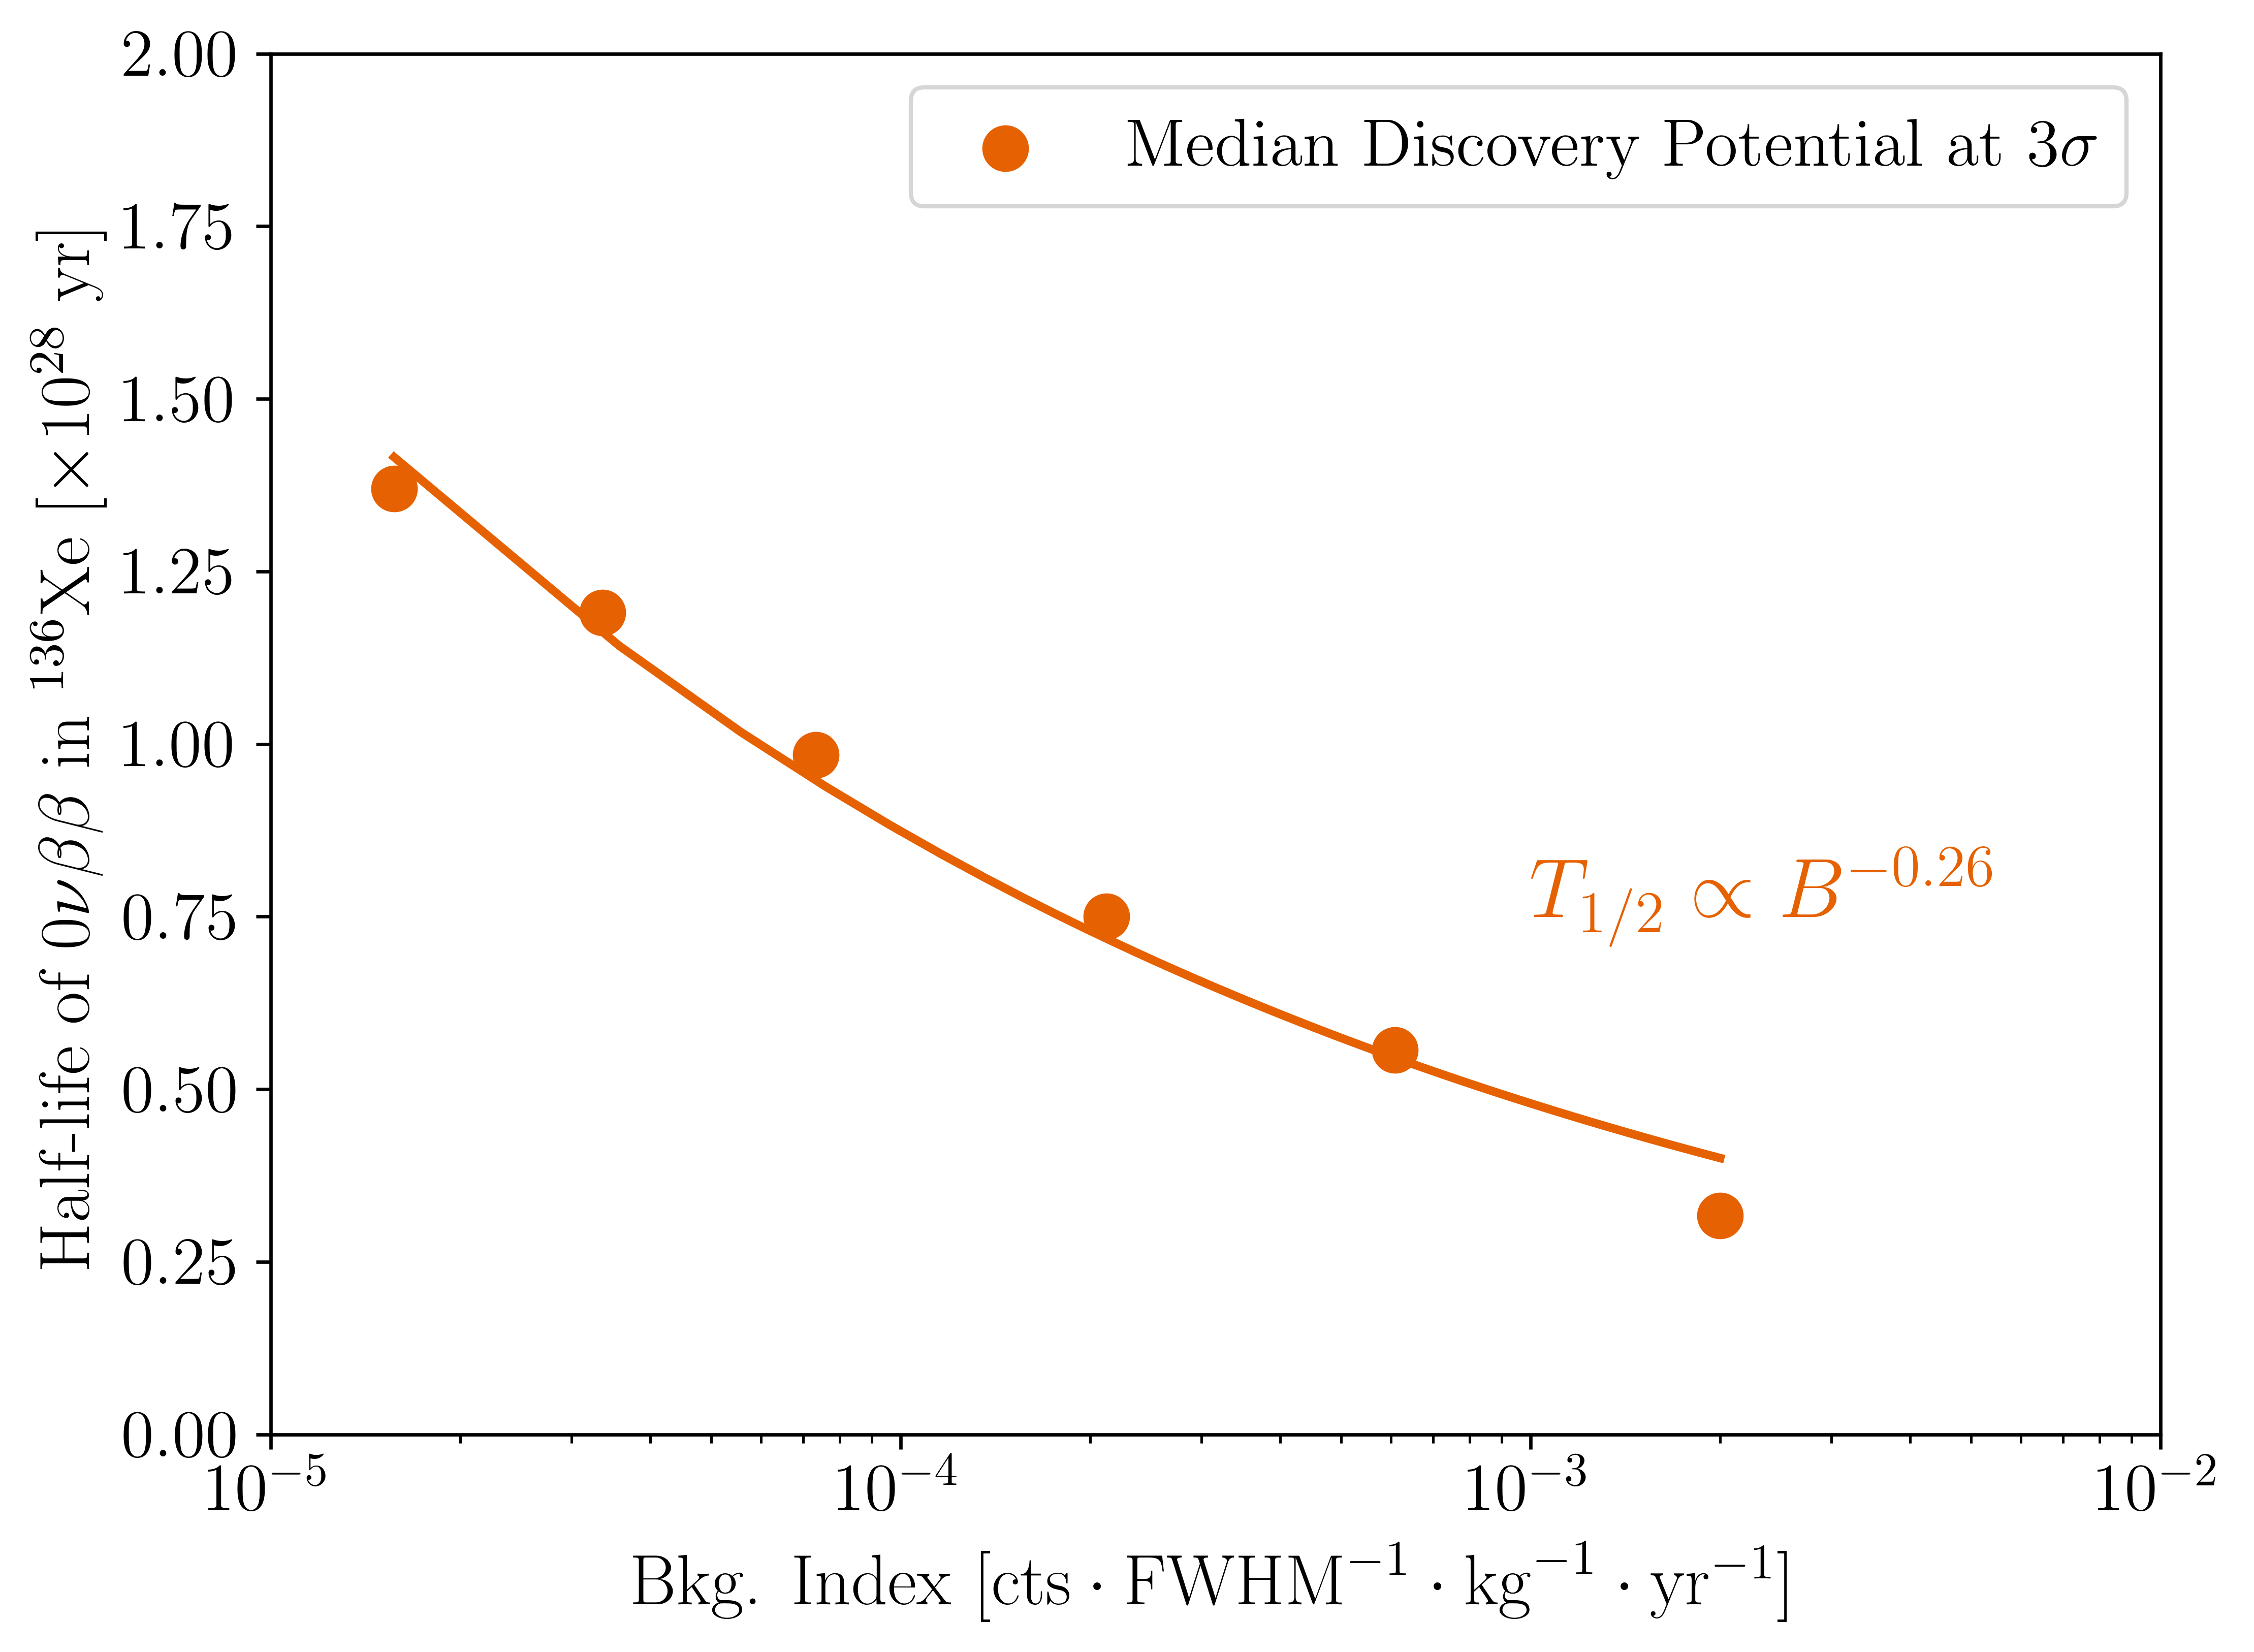

In [5]:
from scipy.optimize import curve_fit
def polyfit(x,a,b):
    return a*x**b

popt, pcov = curve_fit(polyfit, dp_gamma_scaling_d024[:,2], dp_gamma_scaling_d024[:,1]/1e28, p0=[1,-0.3])
xfit = np.linspace(dp_gamma_scaling_d024[0,2], dp_gamma_scaling_d024[-1,2], 100)

plt.figure()
plt.xscale('log')
plt.ylim(0,2)

plt.scatter(dp_gamma_scaling_d024[:,2], dp_gamma_scaling_d024[:,1]/1e28, label='Median Discovery Potential at $3\sigma$', color=colors[1])
plt.plot(xfit,polyfit(xfit, *popt), color=colors[1])

plt.xlabel(r'Bkg. Index [$\mathrm{cts}\cdot \mathrm{FWHM}^{-1}\cdot \mathrm{kg}^{-1} \cdot \mathrm{yr}^{-1}$]')
plt.ylabel('Half-life of $0\\nu\\beta\\beta$ in ${}^{136}\mathrm{Xe}$ [$\\times 10^{28}$ yr]')

plt.text(1E-3, 0.75, "$T_{{1/2}} \\propto B^{{{:1.2f}}}$".format(popt[1]), color=colors[1], fontsize=20)

plt.legend(loc='upper right')
plt.savefig('dp_vs_bkg_index.png')